In [1]:
name = ""
date_returned = "07.05.2023"

# Lab 7. Numerical integration
Hardware 2 course - Mathematics and Physics<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries and functions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

## Problem 1

Estimate the value of the following integrals

a) $S_1 = \int_0^5 \left( x^2 + 2x \right) dx$

b) $S_2 = \int_0^\pi sin(x) dx$

In [3]:
# a)
def f1(x):
    return x**2 + 2*x

def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    return h * (np.sum(y) - 0.5 * (y[0] + y[-1]))

# S1: integral of (x^2 + 2x) dx from 0 to 5
a1, b1 = 0, 5
n1 = 50
S1 = trapezoidal_rule(f1, a1, b1, n1)
print(f"S1 = {S1}")

S1 = 66.675


In [4]:
# b)
def f2(x):
    return np.sin(x)


# S2: integral of sin(x) dx from 1 to pi
a2, b2 = 0, np.pi
n2 = 56
S2 = trapezoidal_rule(f2, a2, b2, n2)
print(f"S2 = {S2}")

S2 = 1.9994754399376726


## Problem 2

Estimate the position from 0 to 10 s, when the velocity is given by

a) $v_1(t)= -9.81 \cdot t$

b) $v_2(t) = -0.5t^2 + 5t$

Use time step $t_s = 0.01$

Plot both the velocity and the estimate position.

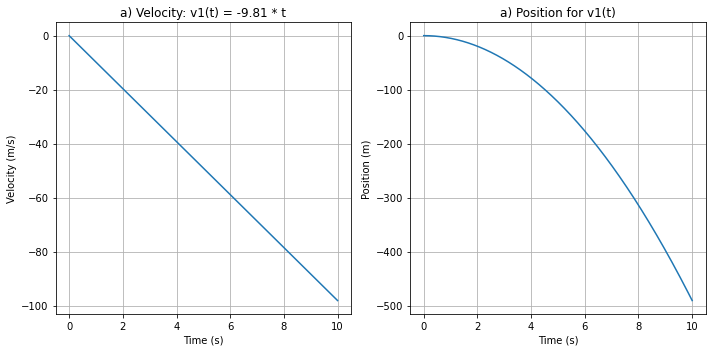

In [5]:
ts = 0.01
t = np.arange(0, 10.01, ts)
v1 = -9.81 * t

p1 = np.zeros(len(t))
N = len(p1)
for n in np.arange(N - 1):
    p1[n + 1] = p1[n] + ts * (v1[n + 1] + v1[n]) / 2

# Plot velocity and position for a)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, v1)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("a) Velocity: v1(t) = -9.81 * t")

plt.subplot(1, 2, 2)
plt.plot(t, p1)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("a) Position for v1(t)")
plt.tight_layout()
plt.show()


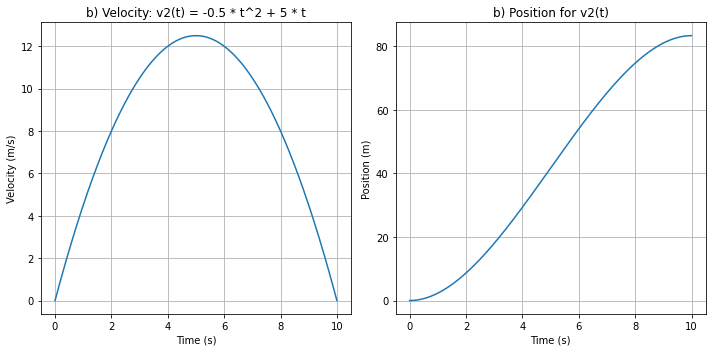

In [6]:
# b)
v2 = -0.5 * t ** 2 + 5 * t

p2 = np.zeros(len(t))
N = len(p2)
for n in np.arange(N - 1):
    p2[n + 1] = p2[n] + ts * (v2[n + 1] + v2[n]) / 2

# Plot velocity and position for b)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, v2)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("b) Velocity: v2(t) = -0.5 * t^2 + 5 * t")

plt.subplot(1, 2, 2)
plt.plot(t, p2)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("b) Position for v2(t)")
plt.tight_layout()
plt.show()



## Problem 3

Collect the accelerometer data using [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&hl=en&gl=US) mobile application.

1. Step into the elevator at the campus to collect the accelerometer (g-force) data. 
1. Drive with the elevator between the floors. 
1. Send the collected data to yourself by email. 
1. Estimate the position of the drive numerically using Python.

Draw plots of the acceleration, velocity, and position data.


time;gFx;gFy;gFz;TgF
0.002872396;0,0516;1,0100;-0,0098;1,011
0.003601041;0,0570;1,0107;-0,0111;1,012
0.004088021;0,0587;1,0087;-0,0165;1,011
0.0045473


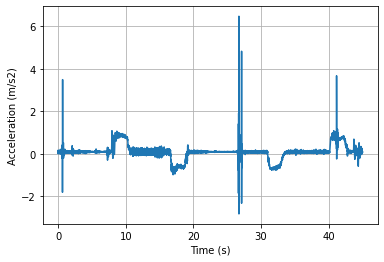

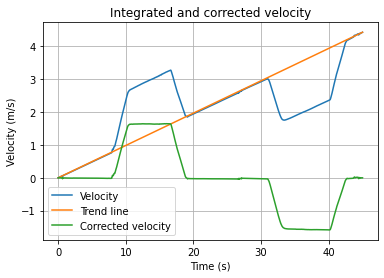

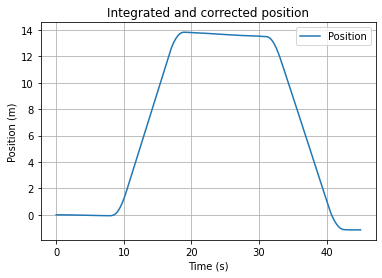

In [7]:
filename = 'elevator.data.csv'

# Open the file, read the text and replace hyphens with minus '-'
txt = Path(filename).read_text().replace('−', '-')  
print(txt[:150]) # Print out first 150 characters

# Write the converted text to the file: data.csv
# Prints out how many characters are written to the file
Path('data.csv').write_text(txt) 

# Read data to dataframe
df = pd.read_csv('data.csv', sep = ';', decimal = '.')

# Print the first 5 rows
df.head(5)
#print(df)

# Convert to numpy arrays
t = df['time'].values
gy = pd.to_numeric(df['gFy'].str.replace(',', '.')).values

#Convert
gy0 = gy - 1.0
ay = 9.81 * gy0

#Acceleration
plt.plot(t, ay)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s2)")
plt.show()



#Velocity
v = np.zeros(len(t))
N = len(v)
for n in np.arange(N - 1):
    v[n + 1] = v[n] + (t[n + 1] - t[n])*((ay[n+1] + ay[n])/2)

max_index = np.argmax(v)
vc = v - (v[max_index] / t[max_index]) * t



plt.plot(t, v, label = "Velocity")
plt.plot(t, (v[max_index] / t[max_index]) * t, label="Trend line")
plt.plot(t, vc, label = "Corrected velocity")
plt.grid()
plt.title("Integrated and corrected velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()



#Position
p = np.zeros(len(t))
N = len(p)
for n in np.arange(N - 1):
    p[n + 1] = p[n] + (t[n + 1] - t[n])*((vc[n+1] + vc[n])/2)

max_index = np.argmax(p)
pc = p - (p[max_index] / t[max_index]) * t



plt.plot(t, p, label = "Position")
#plt.plot(t, (p[max_index] / t[max_index]) * t, label="Trend line")
#plt.plot(t, pc, label = "Corrected position")
plt.grid()
plt.title("Integrated and corrected position")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()


## Problem 4

Collect the accelerometer data using [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&hl=en&gl=US) mobile application.

1. Place your mobile phone on a table (e.g. on a flat surface).
1. Repeate a figure (for example circle) with your mobile by moving it on the surface several times (5-10x).
1. Send the collected data to yourself by email. 
1. Estimate the 2D position (x and y coordinates) of your movement numerically using Python.

Draw plots of the acceleration, velocity and position data.

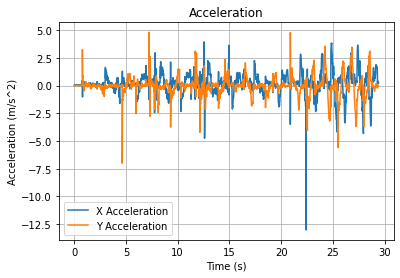

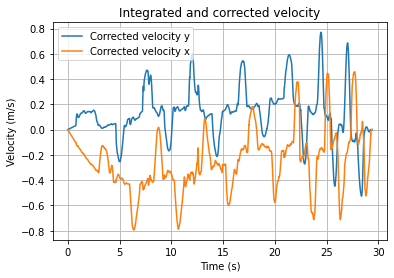

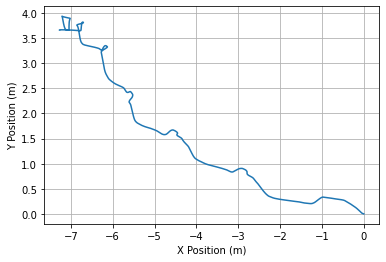

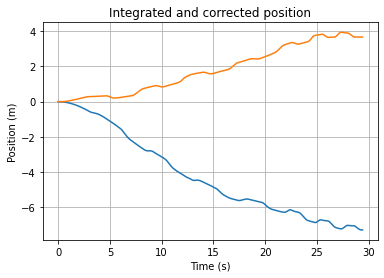

In [8]:
filename = 'accelerometer_table.csv'

# Open the file, read the text and replace commas with periods
txt = Path(filename).read_text().replace(',', '.')
Path('data.csv').write_text(txt)

# Read data to dataframe
df = pd.read_csv('data.csv', sep=';', decimal='.')

# Extract time, x-acceleration, and y-acceleration values as numpy arrays
t = df['time'].values
ax = df['ax (m/s^2)'].values
ay = df['ay (m/s^2)'].values

# Plot acceleration data
plt.plot(t, ax, label='X Acceleration')
plt.plot(t, ay, label='Y Acceleration')
plt.title("Acceleration")
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid()
plt.show()

# Integrate acceleration to get velocity
vx = np.zeros(len(t))
vy = np.zeros(len(t))

for i in range(1, len(t)):
    vx[i] = vx[i - 1] + (t[i] - t[i - 1]) * (ax[i] + ax[i - 1]) / 2
    vy[i] = vy[i - 1] + (t[i] - t[i - 1]) * (ay[i] + ay[i - 1]) / 2
    
# Calculate trend line
trend_line_x = np.linspace(vx[0], vx[-1], len(t))
trend_line_y = np.linspace(vy[0], vy[-1], len(t))

# Correct velocity drift
vx_drift_corrected = vx - trend_line_x
vy_drift_corrected = vy - trend_line_y

# Calculate and correct position drift
px_drift_corrected = np.zeros(len(t))
py_drift_corrected = np.zeros(len(t))

for i in range(1, len(t)):
    px_drift_corrected[i] = px_drift_corrected[i - 1] + (t[i] - t[i - 1]) * (vx_drift_corrected[i] + vx_drift_corrected[i - 1]) / 2
    py_drift_corrected[i] = py_drift_corrected[i - 1] + (t[i] - t[i - 1]) * (vy_drift_corrected[i] + vy_drift_corrected[i - 1]) / 2

# Plot original velocity, trend line, and corrected velocity
#plt.plot(t, vy, label="Velocity y")
#plt.plot(t, trend_line_y, label="Trend line y")
plt.plot(t, vy_drift_corrected, label="Corrected velocity y")
#plt.plot(t, trend_line_x, label="Trend line x")
plt.plot(t, vx_drift_corrected, label="Corrected velocity x")
plt.grid()
plt.title("Integrated and corrected velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()

# Plot position data
plt.figure()
plt.plot(px_drift_corrected, py_drift_corrected)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid()
plt.show()

# Plot corrected position data
plt.plot(t, px_drift_corrected, label = 'X Position')
plt.plot(t, py_drift_corrected, label = 'Y Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.title("Integrated and corrected position")
plt.show()

